# # Analysis to identify which spend is profitable 

**Using Multiple Linear Regression Model**

Author - Niraj Patil

In [4]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import os

In [6]:
print(os.getcwd())

C:\Users\Admin


In [7]:
#Importing DataSet
dataset=pd.read_csv('C:\\Users\\Admin\\Desktop\\50-Startups.csv')

In [8]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [9]:
X=dataset.iloc[:,:-1].values


In [10]:
y=dataset.iloc[:,4].values

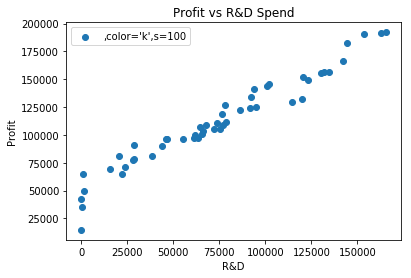

In [11]:
import matplotlib.pyplot as plt
x=dataset.iloc[:,0].values
plt.scatter(x,y,label=",color='k',s=100")
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('Profit vs R&D Spend')
plt.legend()
plt.show()

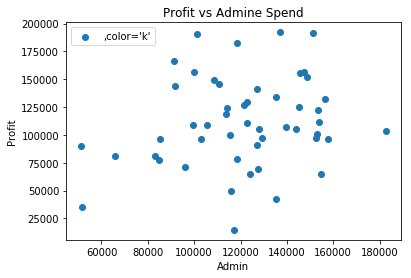

In [12]:
x=dataset.iloc[:,1].values
plt.scatter(x,y,label=",color='k'")
plt.xlabel('Admin')
plt.ylabel('Profit')
plt.title('Profit vs Admine Spend')
plt.legend()
plt.show()


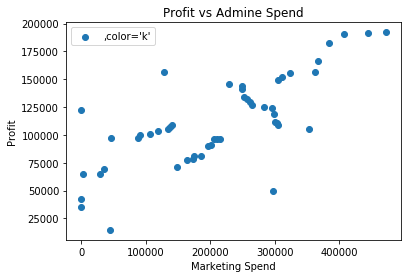

In [13]:
x=dataset.iloc[:,2].values
plt.scatter(x,y,label=",color='k'")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Profit vs Admine Spend')
plt.legend()
plt.show()

In [31]:
df=dataset.iloc[:,3:5]
df.head()

,State,Profit
0,New York,192261.83
1,California,191792.06
2,California,191050.39
3,New York,182901.99
4,California,166187.94


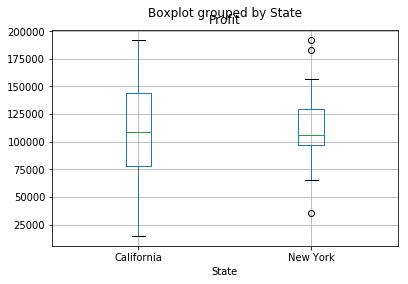

In [15]:
df.boxplot(column='Profit',by='State')

In [16]:
#Encoding Categorical data
#Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [17]:
#Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [18]:

#Splitting the dataset into Training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2 ,random_state = 0)


In [19]:

#Feature Scaaling
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

In [20]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#Predicting the Test set Result
y_pred = regressor.predict(X_test)


In [24]:
#bulding the optimal model using backword elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)


In [25]:
#Fit the Model with all possible predictors
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     218.4
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.53e-29
Time:                        16:24:27   Log-Likelihood:                -525.25
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.521e+04   3326.772      7.577      0.000    1.85e+04    3.19e+04
x1          2.521e+04   3326.772      7.577      0.000    1.85e+04    3.19e+04
x2         -1332.0930   2690.180     -0.495      0.623   -6750.393    4086.207
x3             0.8080      0.046     17.662      0.000       0.716       0.900
x4            -0.0236      0.052     -0.455      0.651      -0.128       0.081
x5             0.0264      0.017      1.581      0.121      -0.007       0.060
==============================================================================
Omnibus:                       15.851   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.631
Skew:                          -0.951   Prob(JB):                     2.72e-06
Kurtosis:                       5.947   Cond. No.                     1.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
#there X2 has the Highest p-value then go for step 4
#step 4 is Remove the predictor which has high p-value

X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        16:24:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.506e+04   3286.176      7.626      0.000    1.84e+04    3.17e+04
x1          2.506e+04   3286.176      7.626      0.000    1.84e+04    3.17e+04
x2             0.8057      0.045     17.846      0.000       0.715       0.897
x3            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x4             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     6.28e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.82e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
#there X1 has the Highest p-value then go for step 4
#step 4 is Remove the predictor which has high p-value


X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        16:24:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#there X2(Admin column) has the Highest p-value then go for step 4
#step 4 is Remove the predictor which has high p-value


X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        16:24:33   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# there X2 (Marketing Spend column) has the Highest p-value then go for step 4
#step 4 is Remove the predictor which has high p-value


X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        16:26:05   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


**Therefore Only One independent variable R&D spend  which definentlys makes very power full predicto**


